In [1]:
# import the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import gc
import re
import  textblob
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud

In [3]:
import gensim #the library for Topic modelling
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models
from gensim.models import CoherenceModel

import pyLDAvis # Text visualzation
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer


from itertools import chain


In [46]:
#predictive Modelling
from sklearn.model_selection import train_test_split

from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import GridSearchCV
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, ensemble
from sklearn.linear_model import LogisticRegression

In [4]:
path = 'C:/Users/Anupama Mehra/Desktop/Data Science/ML CS/'
women_clothing = pd.read_excel( path + 'Womens Clothing Reviews Data.xlsx' )
women_clothing.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [5]:
# Create Data audit Report 
def missing_count(x):
    
    return pd.Series([x.count(), x.isnull().sum(), x.nunique()],
                  index = ['Count', 'NMISS', 'Unique Values'])

In [6]:
women_clothing.apply( missing_count).T

,Count,NMISS,Unique Values
Product ID,23486,0,1206
Category,23472,14,3
Subcategory1,23472,14,6
SubCategory2,23472,14,20
Location,23486,0,4
Channel,23486,0,2
Customer Age,23486,0,77
Review Title,19676,3810,13993
Review Text,22641,845,22634
Rating,23486,0,5


In [7]:
# filling Missing Review Titles with whitespace
# Our main data is Review Text and it have 3.5% of data missing so we can easily drop those missing rows
women_clothing['Review Title'] = women_clothing['Review Title'].fillna('') 
women_clothing.dropna(subset = ['Review Text'],inplace=True)
women_clothing.reset_index(drop = True, inplace= True)

## Performing sentiment analysis on cleaned Data

In [8]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) # can use regex
lemma = WordNetLemmatizer()
def clean(doc):
    # tokenization
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    # stop words
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    # lemmitization
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    # getting rid of Numeric values
    normalized = re.sub(r'[0-9]+',"", normalized) 
    return normalized

In [9]:
women_clothing['Cleaned Text'] = women_clothing['Review Text'].apply(lambda doc:clean(doc))

In [10]:
women_clothing['polarity'] = women_clothing['Cleaned Text'].map(lambda text: TextBlob(text).sentiment.polarity)
women_clothing["sentiment"] = np.where(women_clothing.polarity < 0.1,"Negative","Positive")
women_clothing.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,Cleaned Text,polarity,sentiment
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,,Absolutely wonderful - silky and sexy and comf...,4,1,absolutely wonderful silky sexy comfortable,0.633333,Positive
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,,Love this dress! it's sooo pretty. i happene...,5,1,love dress sooo pretty happened find store im ...,0.318750,Positive
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,high hope dress really wanted work me initiall...,0.082300,Negative
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,love love love jumpsuit fun flirty fabulous ev...,0.500000,Positive
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,shirt flattering due adjustable front tie perf...,0.458333,Positive


In [11]:
women_clothing.sentiment.value_counts()

Positive    18830
Negative     3811
Name: sentiment, dtype: int64

In [12]:
pd.crosstab(women_clothing.sentiment, women_clothing.Rating)

Rating,1,2,3,4,5
sentiment,,,,,
Negative,402,617,836,869,1087
Positive,419,932,1987,4039,11453


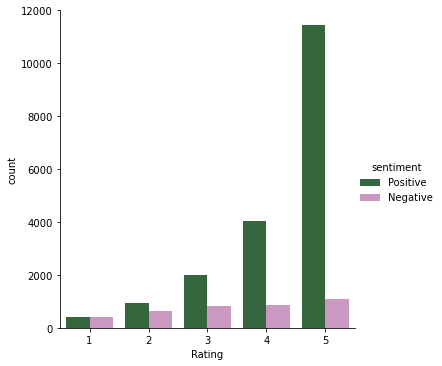

In [13]:
g = sns.catplot(x="Rating", hue="sentiment",
                data=women_clothing, kind="count", palette= "cubehelix" )

# Exploratory Data Analysis

In [14]:
# Adding Age Category on Column so that we can perform some analysis based on Different age groups
women_clothing['Age_cat'] = pd.cut(women_clothing['Customer Age'],bins=[17,24,34,44,54,64,100],
                                   labels=['18-24','25-34','35-44','45-54','55-64','Above 65'])

### Univariate Analysis

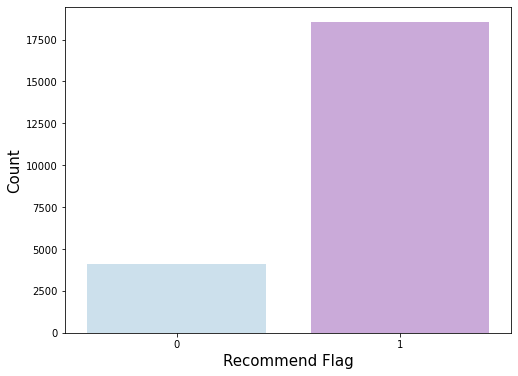

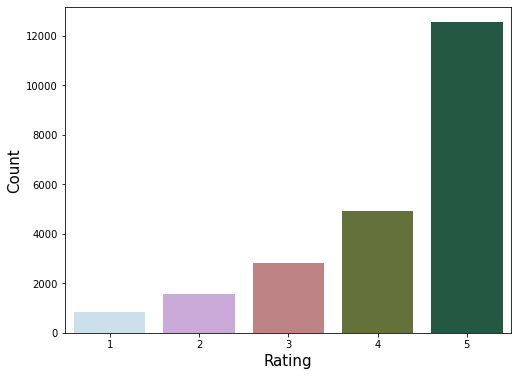

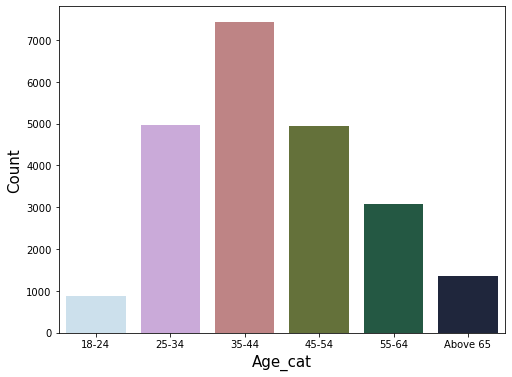

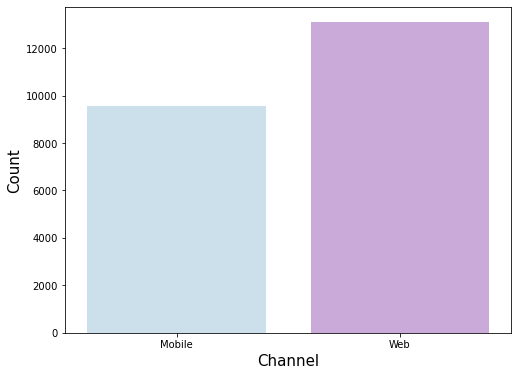

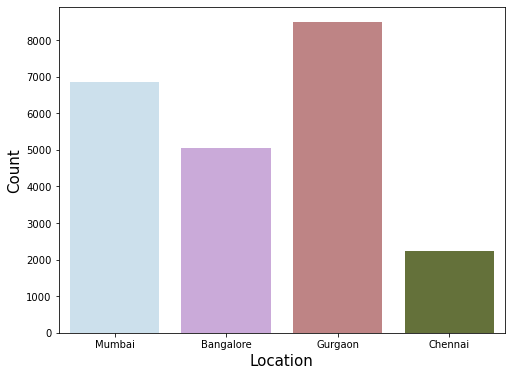

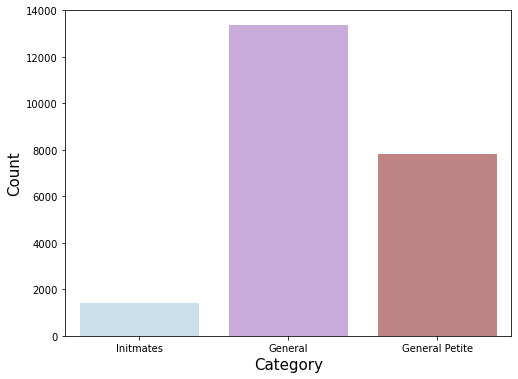

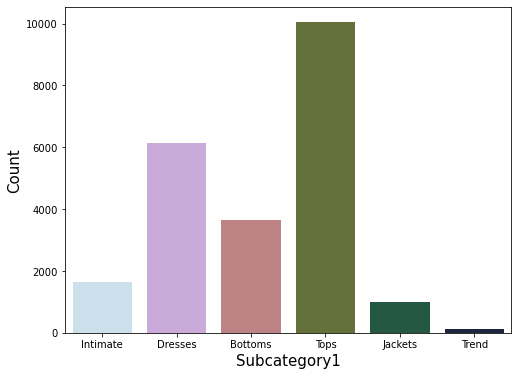

In [15]:
# Count plot For all relevant columns 
Columns = ['Recommend Flag','Rating','Age_cat','Channel', 'Location', 'Category', 'Subcategory1']
for i in women_clothing[Columns]:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=women_clothing[i],palette=sns.color_palette("cubehelix_r"))
    plt.xlabel(i,fontsize=15)
    plt.ylabel("Count",fontsize=15)
    plt.show()

**Data interpretation** - From these graphs we can interpretate 
 1. Recommend Flag - Majority of Custumers are recommending the ordered produt to others as well, they're quite satisfied with the product
 2. Rating - Customers with Higher rating 
 3. Age_cat - The age categories dominating the no. of sales are 25-34,35-44,45-54 
 

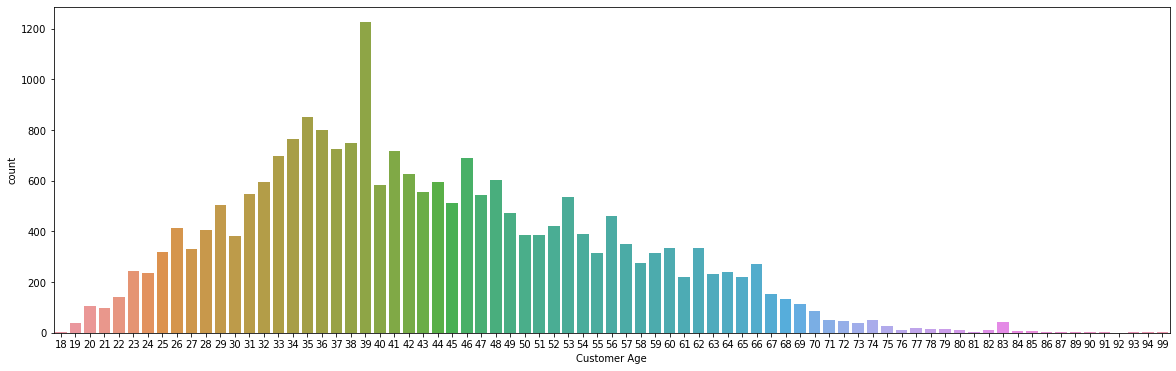

In [16]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'Customer Age', data = women_clothing)
plt.show()

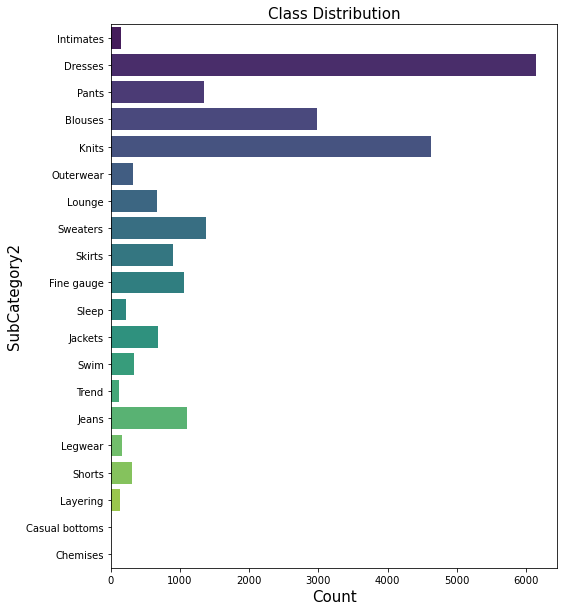

In [17]:
# Count plot For SubCategory2
plt.figure(figsize=(8, 10))
sns.countplot(y='SubCategory2', palette='viridis', data=women_clothing)
plt.title('Class Distribution', size=15)
plt.ylabel('SubCategory2',fontsize=15)
plt.xlabel('Count',fontsize=15)
plt.show()

### Bivariate analysis

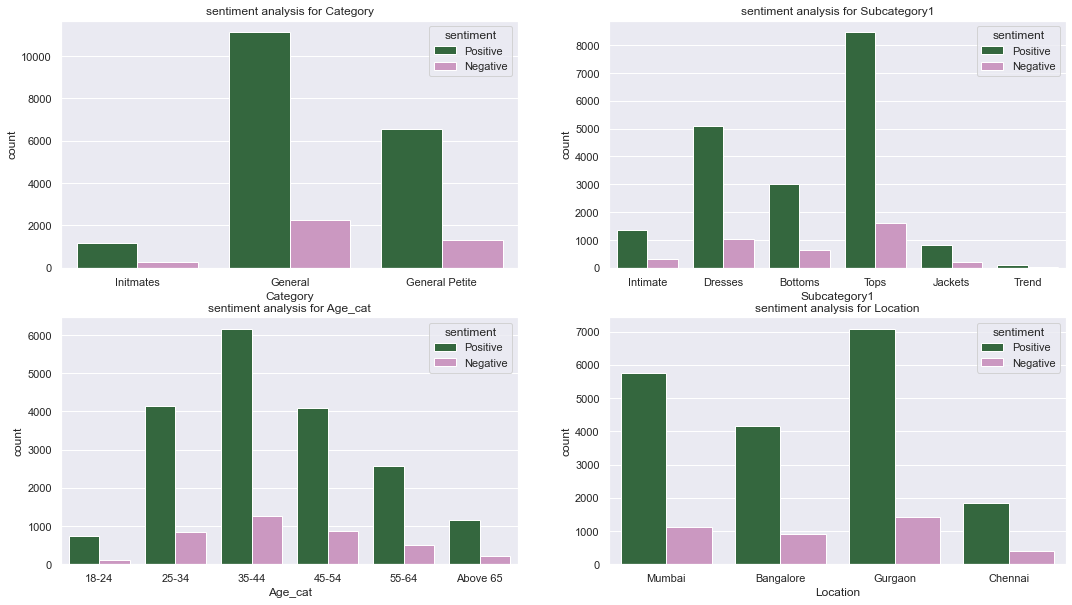

In [18]:
# analysis based on Sentiments 

plt.figure(figsize=(18,10))
the_grid = gridspec.GridSpec(2, 2)

sns.set(font_scale=1) 
plt.subplot(the_grid[0],  title='sentiment analysis for Category')
sns.countplot(x="Category", hue="sentiment" ,data=women_clothing, palette='cubehelix')

plt.subplot(the_grid[1],  title='sentiment analysis for Subcategory1')
sns.countplot(x="Subcategory1", hue="sentiment" ,data=women_clothing,palette='cubehelix')

plt.subplot(the_grid[2],  title='sentiment analysis for Age_cat')
sns.countplot(x="Age_cat", hue="sentiment" ,data=women_clothing,palette='cubehelix')

plt.subplot(the_grid[3],  title='sentiment analysis for Location')
sns.countplot(x="Location", hue="sentiment" ,data=women_clothing,palette='cubehelix')



plt.show()

<Figure size 864x1296 with 0 Axes>

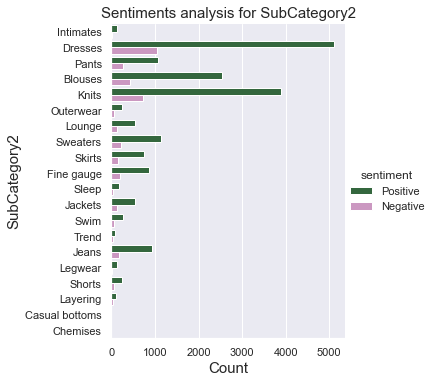

In [19]:
plt.figure(figsize=(12, 18))
sns.catplot(y="SubCategory2", hue="sentiment", data=women_clothing, kind="count", palette= "cubehelix" )
plt.xlabel('Count',fontsize=15)
plt.ylabel('SubCategory2',fontsize=15)
plt.title('Sentiments analysis for SubCategory2', size=15)
plt.show()

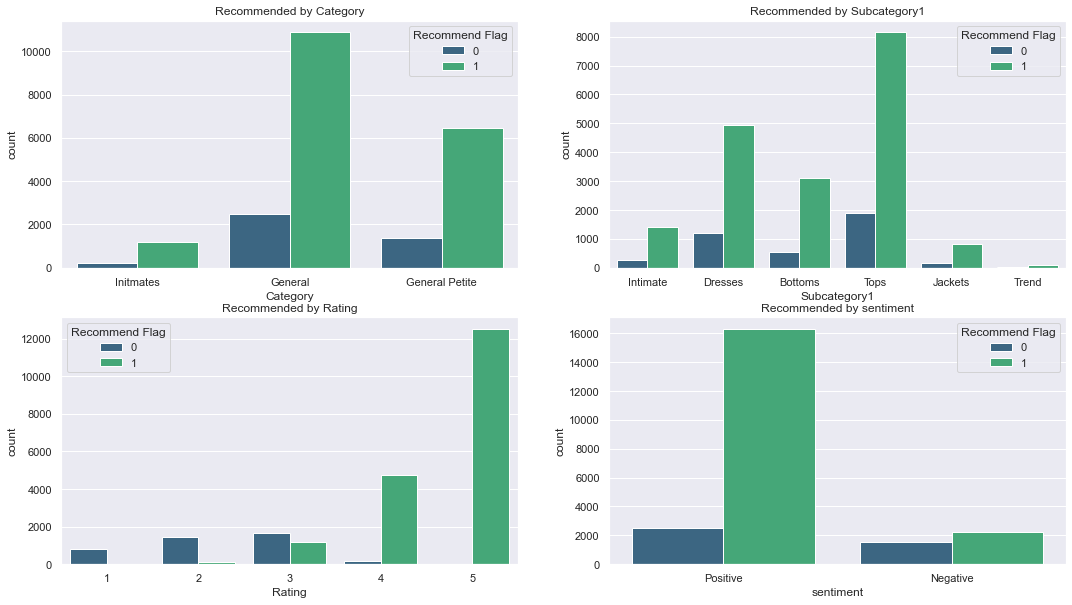

In [20]:
# analysis based on Recommend Flag

plt.figure(figsize=(18,10))
the_grid = gridspec.GridSpec(2, 2)

sns.set(font_scale=1) 
plt.subplot(the_grid[0],  title='Recommended by Category')
sns.countplot(x="Category", hue="Recommend Flag" ,data=women_clothing, palette='viridis')

plt.subplot(the_grid[1],  title='Recommended by Subcategory1')
sns.countplot(x="Subcategory1", hue="Recommend Flag" ,data=women_clothing,palette='viridis')

plt.subplot(the_grid[2],  title='Recommended by Rating')
sns.countplot(x="Rating", hue="Recommend Flag" ,data=women_clothing,palette='viridis')

plt.subplot(the_grid[3],  title='Recommended by sentiment')
sns.countplot(x="sentiment", hue="Recommend Flag" ,data=women_clothing,palette='viridis')

plt.show()

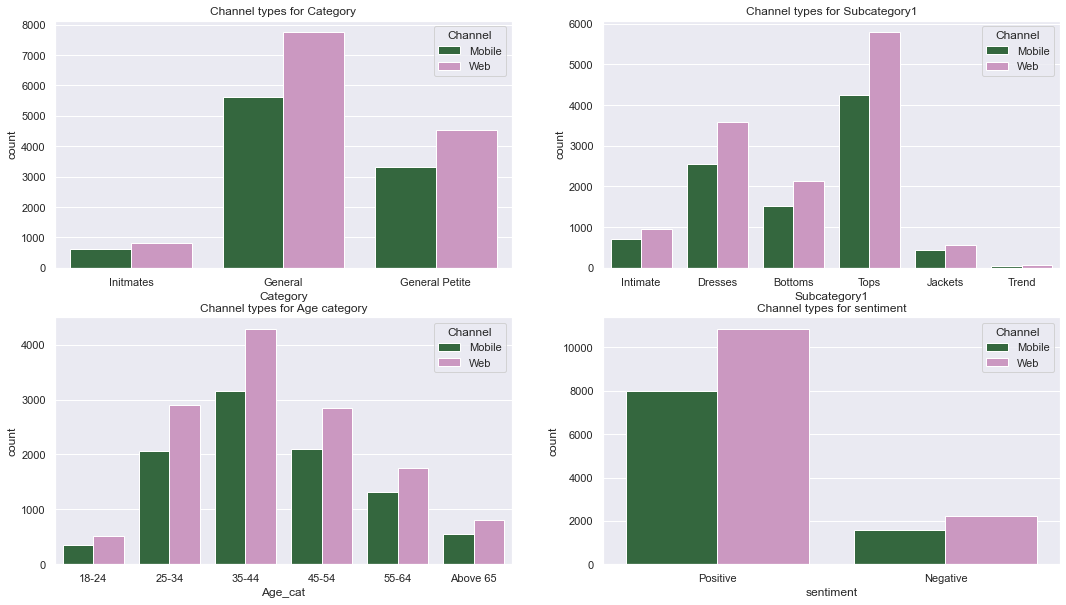

In [21]:
# analysis based on Channel 

plt.figure(figsize=(18,10))
the_grid = gridspec.GridSpec(2, 2)

sns.set(font_scale=1) 
plt.subplot(the_grid[0],  title='Channel types for Category')
sns.countplot(x="Category", hue="Channel" ,data=women_clothing, palette='cubehelix')

plt.subplot(the_grid[1],  title='Channel types for Subcategory1')
sns.countplot(x="Subcategory1", hue="Channel" ,data=women_clothing,palette='cubehelix')

plt.subplot(the_grid[2],  title='Channel types for Age category')
sns.countplot(x="Age_cat", hue="Channel" ,data=women_clothing,palette='cubehelix')

plt.subplot(the_grid[3],  title='Channel types for sentiment')
sns.countplot(x="sentiment", hue="Channel" ,data=women_clothing,palette='cubehelix')


plt.show()

## Word Clouds

#### Adding the Word Counts to the Dataframe and Finding out How Many Times Some Words Were Used

In [22]:
# CountVectorizer() converts a collection of text documents to a matrix of token counts
vectorizer = CountVectorizer()
# assign a shorter name for the analyze which tokenizes the string
analyzer = vectorizer.build_analyzer()

def wordcounts(s):
    c = {}
    # tokenize the string and continue, if it is not empty
    if analyzer(s):
        d = {}
        # find counts of the vocabularies and transform to array 
        w = vectorizer.fit_transform([s]).toarray()
        # vocabulary and index (index of w)
        vc = vectorizer.vocabulary_
        # items() transforms the dictionary's (word, index) tuple pairs
        for k,v in vc.items():
            d[v]=k # d -> index:word 
        for index,i in enumerate(w[0]):
            c[d[index]] = i # c -> word:count
    return  c

# add new column to the dataframe
women_clothing['Word Counts'] = women_clothing['Cleaned Text'].apply(wordcounts)
women_clothing.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,Cleaned Text,polarity,sentiment,Age_cat,Word Counts
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,,Absolutely wonderful - silky and sexy and comf...,4,1,absolutely wonderful silky sexy comfortable,0.633333,Positive,25-34,"{'absolutely': 1, 'comfortable': 1, 'sexy': 1,..."
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,,Love this dress! it's sooo pretty. i happene...,5,1,love dress sooo pretty happened find store im ...,0.318750,Positive,25-34,"{'bc': 2, 'bought': 1, 'definitely': 1, 'dress..."
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,high hope dress really wanted work me initiall...,0.082300,Negative,55-64,"{'bottom': 1, 'cheap': 1, 'comfortable': 1, 'c..."
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,love love love jumpsuit fun flirty fabulous ev...,0.500000,Positive,45-54,"{'compliment': 1, 'every': 1, 'fabulous': 1, '..."
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,shirt flattering due adjustable front tie perf...,0.458333,Positive,45-54,"{'adjustable': 1, 'cardigan': 1, 'due': 1, 'fl..."


#### Demonstrating the Densities of Class Names, Some Selected Words and All Words in the Reviews By Using WordCloud

Selected Words
love     8961
great    6070
super    1688
happy     704
glad      611
dtype: int64

SubCategory2
Dresses     6145
Knits       4626
Blouses     2983
Sweaters    1380
Pants       1350
Name: SubCategory2, dtype: int64


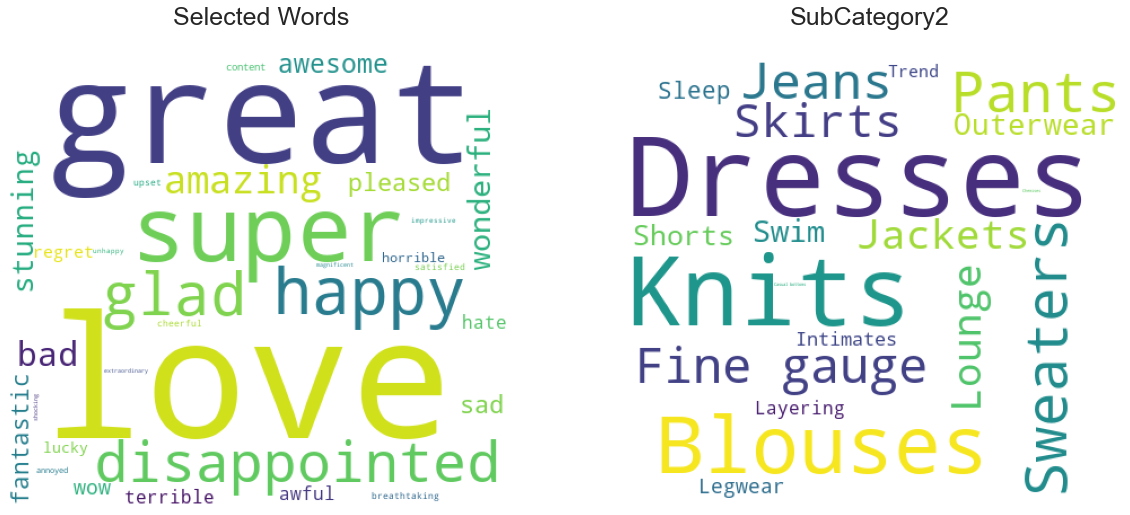

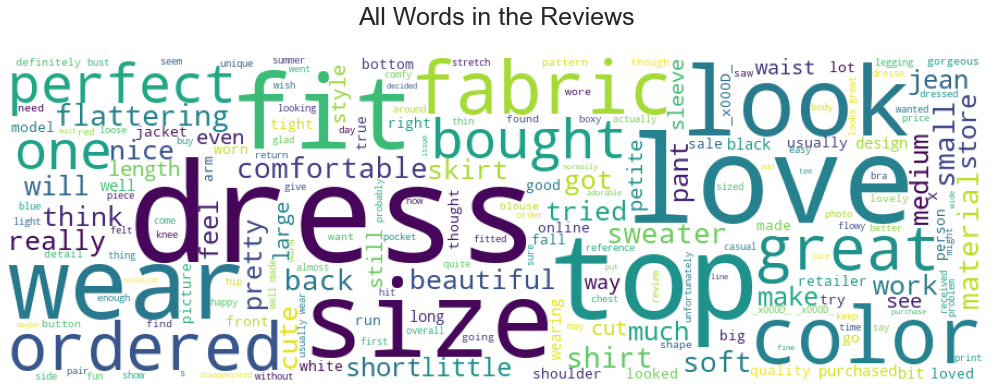

In [23]:
# selecting some words to examine detailed 
selectedwords = ['awesome','great','fantastic','extraordinary','amazing','super',
                 'magnificent','stunning','impressive','wonderful','breathtaking',
                 'love','content','pleased','happy','glad','satisfied','lucky',
                 'shocking','cheerful','wow','sad','unhappy','horrible','regret',
                 'bad','terrible','annoyed','disappointed','upset','awful','hate']

def selectedcount(dic,word):
    if word in dic:
        return dic[word]
    else:
        return 0
    
women_clothing_wc = women_clothing.copy()  
for word in selectedwords:
    women_clothing_wc[word] = women_clothing_wc['Word Counts'].apply(selectedcount,args=(word,))
    
word_sum = women_clothing_wc[selectedwords].sum()
print('Selected Words')
print(word_sum.sort_values(ascending=False).iloc[:5])

print('\nSubCategory2')
print(women_clothing['SubCategory2'].fillna("Empty").value_counts().iloc[:5])

fig, ax = plt.subplots(1,2,figsize=(20,10))
wc0 = WordCloud(background_color='white',
                      width=450,
                      height=400 ).generate_from_frequencies(word_sum)

cn = women_clothing['SubCategory2'].fillna(" ").value_counts()
wc1 = WordCloud(background_color='white',
                      width=450,
                      height=400 
                     ).generate_from_frequencies(cn)

ax[0].imshow(wc0)
ax[0].set_title('Selected Words\n',size=25)
ax[0].axis('off')

ax[1].imshow(wc1)
ax[1].set_title('SubCategory2\n',size=25)
ax[1].axis('off')

rt = women_clothing['Review Text']
plt.subplots(figsize=(18,6))
wordcloud = WordCloud(background_color='white',
                      width=900,
                      height=300
                     ).generate(" ".join(rt))
plt.imshow(wordcloud)
plt.title('All Words in the Reviews\n',size=25)
plt.axis('off')
plt.show()

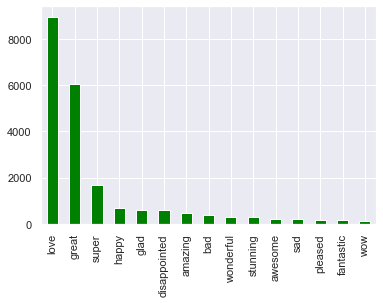

In [24]:
word_sum.sort_values(ascending=False).iloc[:15].plot(kind='bar', color='Green')
plt.show()

In [25]:
Positive_reviews = women_clothing.loc[women_clothing['sentiment'] == 'Positive', 'Cleaned Text']

In [26]:
Negative_reviews = women_clothing.loc[women_clothing['sentiment'] == 'Negative', 'Cleaned Text']

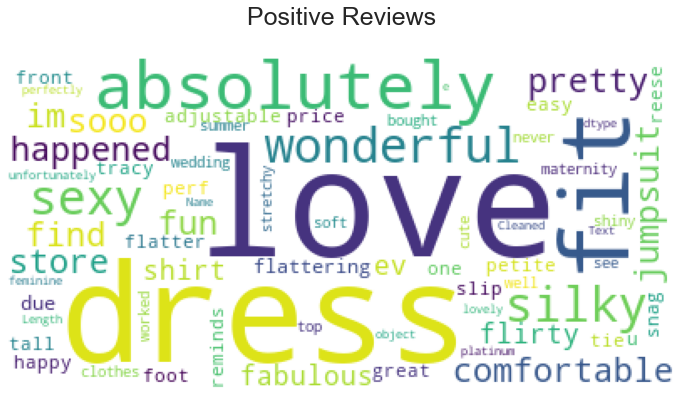

In [27]:
wordcloud = WordCloud(background_color='white').generate(str(Positive_reviews))
   
fig = plt.figure(1, figsize = (12,12))
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Positive Reviews\n',size=25)
plt.show()       


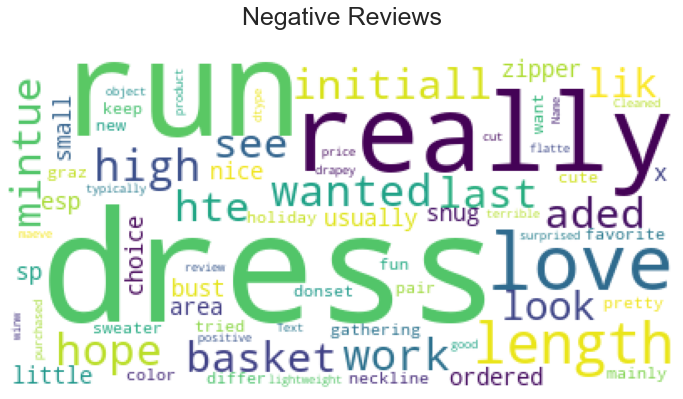

In [28]:
wordcloud = WordCloud(background_color='white').generate(str(Negative_reviews))
   
fig = plt.figure(1, figsize = (12,12))
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Negative Reviews\n',size=25)
plt.show()  

## Frequency graph of N-grams

In [29]:
def get_top_ngrams(corpus, ngram_range, stop_words=None, n=None):
    vec = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    common_words = words_freq[:n]
    words = []
    freqs = []
    for word, freq in common_words:
        words.append(word)
        freqs.append(freq)
        
    women_clothing = pd.DataFrame({'Word': words, 'Freq': freqs})
    return women_clothing


In [30]:
stop_words = 'english'
n = 20
unigrams_st = get_top_ngrams(women_clothing['Review Text'], (1, 1), stop_words, n)
bigrams_st = get_top_ngrams(women_clothing['Review Text'], (2, 2), stop_words, n)
trigrams_st = get_top_ngrams(women_clothing['Review Text'], (3, 3), stop_words, n)

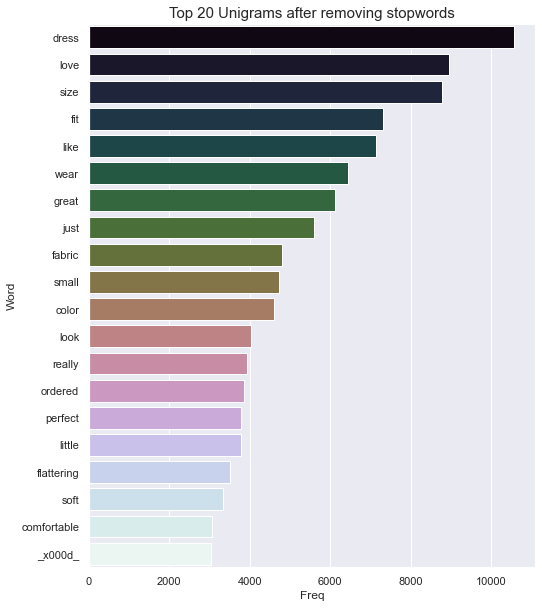

In [31]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', palette= "cubehelix", data=unigrams_st)
plt.title('Top 20 Unigrams after removing stopwords', size=15)
plt.show()

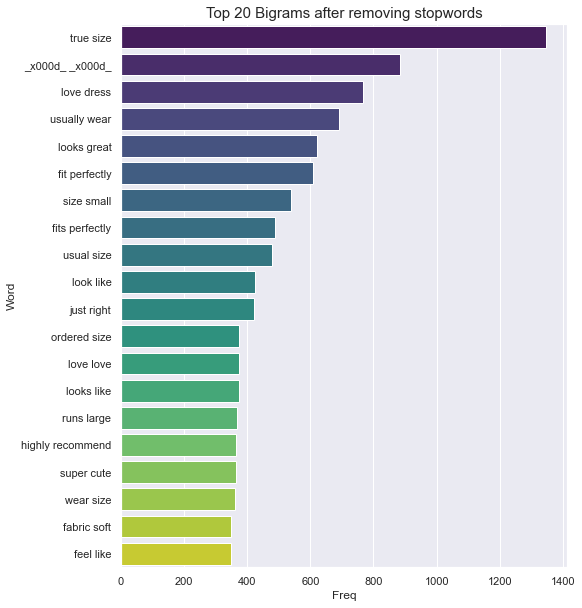

In [32]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', palette='viridis', data=bigrams_st)
plt.title('Top 20 Bigrams after removing stopwords', size=15)
plt.show()

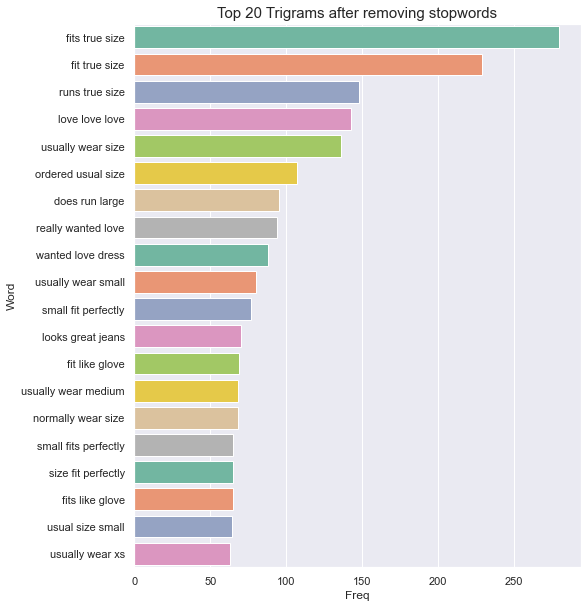

In [33]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word',palette='Set2', data=trigrams_st)
plt.title('Top 20 Trigrams after removing stopwords', size=15)
plt.show()

# Topic modelling

In [34]:
#clean the data and array of unicode tokens
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(text):
    stop_free = ' '.join([word for word in text.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join([lemma.lemmatize(word) for word in punc_free.split()])
    return normalized.split()

women_clothing['text_clean']=women_clothing['Review Text'].apply(clean)

In [35]:
#create dictionary 
dictionary = corpora.Dictionary(women_clothing['text_clean'])
#Total number of non-zeroes in the BOW matrix (sum of the number of unique words per document over the entire corpus).
print(dictionary.num_nnz)

626600


In [36]:
#create document term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in women_clothing['text_clean'] ]
print(len(doc_term_matrix))

22641


In [37]:
doc_term_matrix[:1]

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]]

In [38]:
# Human readable format of corpus (term-frequency)

[[(dictionary[id], freq) for id, freq in cp] for cp in doc_term_matrix[:1]]

[[('absolutely', 1),
  ('comfortable', 1),
  ('sexy', 1),
  ('silky', 1),
  ('wonderful', 1)]]

In [39]:
# initializing LDA model 
lda = gensim.models.ldamodel.LdaModel

In [40]:
num_topics= 22
%time ldamodel = lda(doc_term_matrix,num_topics=num_topics,id2word=dictionary,passes=50,minimum_probability=0)

Wall time: 13min 6s


In [41]:
topics = ldamodel.show_topics(formatted=False, num_words=100)
    
for t in range(len(topics)):
    print("\nTopic {}, top {} words:".format(t+1,100))
    print(" ".join([w[0] for w in topics[t][1]]))


Topic 1, top 100 words:
dress love wear it compliment perfect comfortable great fit many flattering beautiful get wore color work cant worn dressed down bought received got wait absolutely time casual lot wearing well one feel make fun look day summer easy go gorgeous wedding every piece could boot ive im style favorite night easily perfectly heel fall versatile skirt made cute special unique quality black occasion year new also elegant necklace yet purchased pretty everything worth sandal material print different stunning amazing right classic too enough think closet definitely flat paired little out best feminine happy always thing adorable cannot friend extremely design

Topic 2, top 100 words:
super recommend comfy cute soft fitting highly comfortable flattering jumpsuit still love form romper would body definitely easy baby type money looking incredibly relaxed classy buying both 25 loose want material in hide im pregnant belly without flowy tucked far comfortably post forgiving 

In [42]:
ldamodel.print_topics(num_topics=num_topics)

[(0,
  '0.040*"top" + 0.031*"wear" + 0.019*"bra" + 0.018*"see" + 0.017*"im" + 0.016*"price" + 0.015*"sheer" + 0.015*"underneath" + 0.014*"sale" + 0.013*"need"'),
 (1,
  '0.064*"petite" + 0.057*"im" + 0.046*"fit" + 0.044*"x" + 0.040*"lb" + 0.034*"small" + 0.028*"ordered" + 0.024*"regular" + 0.024*"length" + 0.023*"size"'),
 (2,
  '0.093*"blouse" + 0.088*"person" + 0.037*"embroidery" + 0.034*"beautiful" + 0.034*"picture" + 0.032*"online" + 0.026*"even" + 0.025*"much" + 0.022*"photo" + 0.021*"better"'),
 (3,
  '0.074*"lace" + 0.072*"detail" + 0.066*"tee" + 0.041*"back" + 0.033*"sleeve" + 0.031*"front" + 0.028*"button" + 0.019*"white" + 0.018*"cotton" + 0.014*"add"'),
 (4,
  '0.062*"summer" + 0.049*"light" + 0.042*"fabric" + 0.038*"perfect" + 0.033*"weight" + 0.025*"add" + 0.024*"spring" + 0.024*"nice" + 0.021*"soft" + 0.019*"wear"'),
 (5,
  '0.307*"shirt" + 0.049*"wash" + 0.043*"washed" + 0.033*"dry" + 0.025*"hand" + 0.022*"washing" + 0.016*"clean" + 0.014*"gotten" + 0.014*"everyday" + 0.

### Compute Model Perplexity and Coherence Score

Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is. 


In [43]:
# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts= women_clothing['text_clean'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Perplexity:  -8.098283408542967

Coherence Score:  0.44912323588394865


In [44]:
lda_display = gensimvis.prepare(ldamodel, doc_term_matrix, dictionary, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display)

**how to infer pyLDAvis’s output?**

Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic.

A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.

A model with too many topics, will typically have many overlaps, small sized bubbles clustered in one region of the chart.


## Predictive Analysis 

In [47]:
#Predicting Ratings based on Cleaned text and comparing it with Custumer's original Rating
X = women_clothing['Cleaned Text']
Y = women_clothing[['Rating']]

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=7)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16980,)
(5661,)
(16980, 1)
(5661, 1)


### Vectorization (count, tfidf) for both train & test

In [64]:
#Train
count_vect = CountVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ),  
                             lowercase = True,
                             encoding='latin-1' , 
                             max_features=2000)
X_train_count = count_vect.fit_transform(X_train)

tfidf_vect = TfidfVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             encoding='latin-1' , 
                             lowercase = True,
                             max_features=2000)
X_train_tfidf = tfidf_vect.fit_transform(X_train)

#Test
X_test_count = count_vect.transform(X_test)
X_test_tfidf = tfidf_vect.transform(X_test)
### Vectorization (count, tfidf) for both train & test

In [65]:
dtm_count=pd.DataFrame(X_train_count.toarray(), columns=count_vect.get_feature_names())
dtm_tfidf=pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vect.get_feature_names())

In [66]:
dtm_count

,a,able,about,absolute,absolutely,accent,accentuate,accentuated,accentuates,accessory,...,yoga,yoke,you,young,younger,zero,zip,zipped,zipper,â
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16975,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16976,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
dtm_tfidf

,a,able,about,absolute,absolutely,accent,accentuate,accentuated,accentuates,accessory,...,yoga,yoke,you,young,younger,zero,zip,zipped,zipper,â
0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.198511,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16975,0.0,0.000000,0.0,0.0,0.173307,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
16976,0.0,0.171651,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
16977,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
16978,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


## Classification Models for Predicting Ratings Based on Text Data

In [68]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,  valid_y, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return {'pred':predictions,'metrics':metrics.accuracy_score(predictions, valid_y)}

In [69]:
#Naive Bayes
# Naive Bayes on Count Vectors and TF-IDF
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_count, y_train, X_test_count, y_test)

print("NB  for L1, Count Vectors: ", accuracy_L1["metrics"])


NB  for L1, Count Vectors:  0.6332803391626921


In [70]:
# Naive Bayes on Word Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf, y_test)

print("NB  for L1, WordLevel TF-IDF: ", accuracy_L1["metrics"])

pred_sentiment = pd.Series(accuracy_L1["pred"])
pred_sentiment.head()

# use the sentiment column instead of stars

NB  for L1, WordLevel TF-IDF:  0.6124359653771418


0    5
1    5
2    5
3    5
4    5
dtype: int64

In [71]:
pred_sentiment.value_counts()

5    4924
4     349
3     347
2      31
1      10
dtype: int64

In [72]:
#Logistic Regression
# Logistic Regression on Count Vectors and TF-IDF
accuracy_L1 = train_model(LogisticRegression(), X_train_count, y_train, X_test_count, y_test)

print("LR  for L1, Count Vectors: ", accuracy_L1["metrics"])

# Logistic Regression on Word Level TF IDF Vectors

accuracy_L1 = train_model(LogisticRegression(), X_train_tfidf, y_train, X_test_tfidf, y_test)

print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1["metrics"])


LR  for L1, Count Vectors:  0.6270976859212153
LR  for L1, WordLevel TF-IDF:  0.6484720014131778


In [73]:
#Linear SVC
# Linear SVC on Count Vectors and TF-IDF
accuracy_L1 = train_model(svm.LinearSVC(), X_train_count, y_train, X_test_count, y_test)

print("SVC  for L1, Count Vectors: ", accuracy_L1["metrics"])

# Linear SVC on Word Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), X_train_tfidf, y_train, X_test_tfidf, y_test)

print("SVC  for L1, WordLevel TF-IDF: ", accuracy_L1["metrics"])

SVC  for L1, Count Vectors:  0.6209150326797386
SVC  for L1, WordLevel TF-IDF:  0.6364599894011659


## Classification Models for Predicting Recommendation Based on Text Data

In [74]:
#dummy variable creation
women_clothing['sentiment_val'] = women_clothing['sentiment'].map({"Positive": 1,"Negative": -1})

In [75]:
x = women_clothing[['Rating', 'sentiment_val', 'polarity']]
x.corr()

,Rating,sentiment_val,polarity
Rating,1.000000,0.305614,0.356416
sentiment_val,0.305614,1.000000,0.644771
polarity,0.356416,0.644771,1.000000


In [76]:
x = tfidf_vect.fit_transform(women_clothing['Cleaned Text'])

In [77]:
type(x)

scipy.sparse.csr.csr_matrix

In [78]:
print(x.get_shape())
import scipy
from scipy.sparse import hstack
x = hstack((x,scipy.sparse.csr.csr_matrix(women_clothing['Rating']).T))
x = hstack((x,scipy.sparse.csr.csr_matrix(women_clothing['sentiment_val']).T))
x = hstack((x,scipy.sparse.csr.csr_matrix(women_clothing['polarity']).T))

x = x.toarray()
print(x.shape)

#------------------------------------------------------------------------

y =women_clothing['Recommend Flag'].tolist()
y = np.array(y)
print(y[:5])
print(y.shape)

(22641, 2000)
(22641, 2003)
[1 1 0 1 1]
(22641,)


In [79]:
# splitting data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=123)

### Model 1 = Logistic Regression

In [109]:
# Initializing Model
linreg_model = linear_model.LogisticRegression()
# Fitting Model
ln_model = linreg_model.fit( x_train, y_train )
# Predict the outputs
y_train_pred_lin = ln_model.predict( x_train )
y_test_pred_lin = ln_model.predict( x_test )

# evaluate the goodness of model using r2
print('R2 train:', metrics.r2_score( y_train, y_train_pred_lin ))
print('R2 test:', metrics.r2_score( y_test, y_test_pred_lin ))

# evaluate the model using mae
print('MAE train:',metrics.mean_absolute_error(y_train, y_train_pred_lin))
print('MAE test:',metrics.mean_absolute_error(y_test, y_test_pred_lin))

R2 train: 0.7220420021313063
R2 test: 0.5910418587497694
MAE train: 0.04163722025912839
MAE test: 0.058823529411764705


In [110]:
print('Logistic Regression model AUC score for train data:',metrics.roc_auc_score(y_train,y_train_pred_lin))
print('Logistic Regression model AUC score for test data:',metrics.roc_auc_score(y_test, y_test_pred_lin))

Logistic Regression model AUC score for train data: 0.9309460811922349
Logistic Regression model AUC score for test data: 0.9003614235662918


### Model 2 =  Ridge Classifier

In [111]:
# model fit
# choose value alpha based on best fit
Ridge_model = linear_model.RidgeClassifier( alpha = 100).fit( x_train, y_train )

# predict the y on train and test
y_train_pred_ridge = Ridge_model.predict( x_train )
y_test_pred_ridge = Ridge_model.predict( x_test )

# evaluate the goodness of model using r2
print('R2 train:', metrics.r2_score( y_train, y_train_pred_ridge ))
print('R2 test:', metrics.r2_score( y_test, y_test_pred_ridge ))

# evaluate the model using mae
print('MAE train:',metrics.mean_absolute_error(y_train, y_train_pred_ridge))
print('MAE test:',metrics.mean_absolute_error(y_test, y_test_pred_ridge))

R2 train: 0.6402665232675322
R2 test: 0.5812170385395538
MAE train: 0.053886925795053005
MAE test: 0.06023670729553082


In [112]:
print('Ridge Regression model AUC score for train data:',metrics.roc_auc_score(y_train,y_train_pred_ridge))
print('Ridge Regression model AUC score for test data:', metrics.roc_auc_score(y_test, y_test_pred_ridge))

Ridge Regression model AUC score for train data: 0.9075153726689199
Ridge Regression model AUC score for test data: 0.8979052185137377


### Model 3 =  Naive Bayes

In [91]:
from sklearn.naive_bayes import BernoulliNB
nb_clf = BernoulliNB()
nb_clf.fit( x_train, y_train );

In [113]:
# predict the y on train and test
y_train_pred_nb = nb_clf.predict( x_train )
y_test_pred_nb = nb_clf.predict( x_test )

# evaluate the goodness of model using r2
print('R2 train:', metrics.r2_score( y_train, y_train_pred_nb ))
print('R2 test:', metrics.r2_score( y_test, y_test_pred_nb ))

# evaluate the model using mae
print('MAE train:',metrics.mean_absolute_error(y_train, y_train_pred_nb))
print('MAE test:',metrics.mean_absolute_error(y_test, y_test_pred_nb))

R2 train: 0.2361069450369564
R2 test: 0.1562935644477227
MAE train: 0.11442873969375736
MAE test: 0.12135665076841548


In [114]:
print('Ridge Regression model AUC score for train data:',metrics.roc_auc_score(y_train,y_train_pred_nb))
print('Ridge Regression model AUC score for test data:', metrics.roc_auc_score(y_test, y_test_pred_nb))

Ridge Regression model AUC score for train data: 0.8538915441782982
Ridge Regression model AUC score for test data: 0.8368910197307764


### Model 4 =  Random Forest Classifier

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
pargrid_rf = { 'n_estimators': [ 120, 150, 170, 200] }

gscv_rf = GridSearchCV(estimator = RandomForestClassifier( random_state = 1 ), 
                        param_grid = pargrid_rf, 
                        cv = 5,
                        scoring = 'roc_auc',
                        n_jobs = -1 ).fit( x_train, y_train )

In [106]:
y_train_pred_rf = gscv_rf.best_estimator_.predict(x_train)
y_test_pred_rf = gscv_rf.best_estimator_.predict(x_test)

In [107]:
# evaluate the goodness of model using r2
print('R2 train:', metrics.r2_score( y_train, y_train_pred_rf ))
print('R2 test:', metrics.r2_score( y_test, y_test_pred_rf ))

# evaluate the model using mae
print('MAE train:',metrics.mean_absolute_error(y_train, y_train_pred_rf))
print('MAE test:',metrics.mean_absolute_error(y_test, y_test_pred_rf))

R2 train: 1.0
R2 test: 0.568936013276784
MAE train: 0.0
MAE test: 0.06200317965023847


In [108]:
print('Random Forest model AUC score for train data:', metrics.accuracy_score( y_train, y_train_pred_rf))
print('Random Forest model AUC score for test data:', metrics.accuracy_score( y_test, y_test_pred_rf))

Random Forest model AUC score for train data: 1.0
Random Forest model AUC score for test data: 0.9379968203497615


#### Model conclusion

For this data  
- Logistic Regression and Ridge Classifiers are working really well with good Accuracy and R2 Values.

- While, Naive Bayes is not really understanding the patterns of the data(R2 is low) and Random forest is overfitting the data.